## Preparations

Let us first load all the python libraries again

In [1]:
import sys
import os
madminer_src_path = "/Users/felixkling/Documents/GitHub/madminer"
sys.path.append(madminer_src_path)

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline

from madminer.sampling import SampleAugmenter
from madminer.sampling import constant_benchmark_theta, multiple_benchmark_thetas
from madminer.sampling import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas

## T1 Cross-Check: Check Distriobutions

Let us first validate some distributions, to check if the sampling works properly

### T1a) Get the Data at Truth Level

Let us use the SampleAugmenter to get the weighted samples directly. This can be done via `extract_raw_data(theta)`

In [2]:
sa = SampleAugmenter('data/madminer_lhedata.h5', debug=False)
nsamples=10000

x_weighted, weights = sa.extract_raw_data(theta=[0.,0.])

Next, we extract the unweighted distributions

In [3]:
x_unweighted, _ = sa.extract_samples_train_plain(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=nsamples,
    folder=None,
    filename=None,
    test_split=None
)

### T1b) Plot Distributions

And now we can plot the distributions

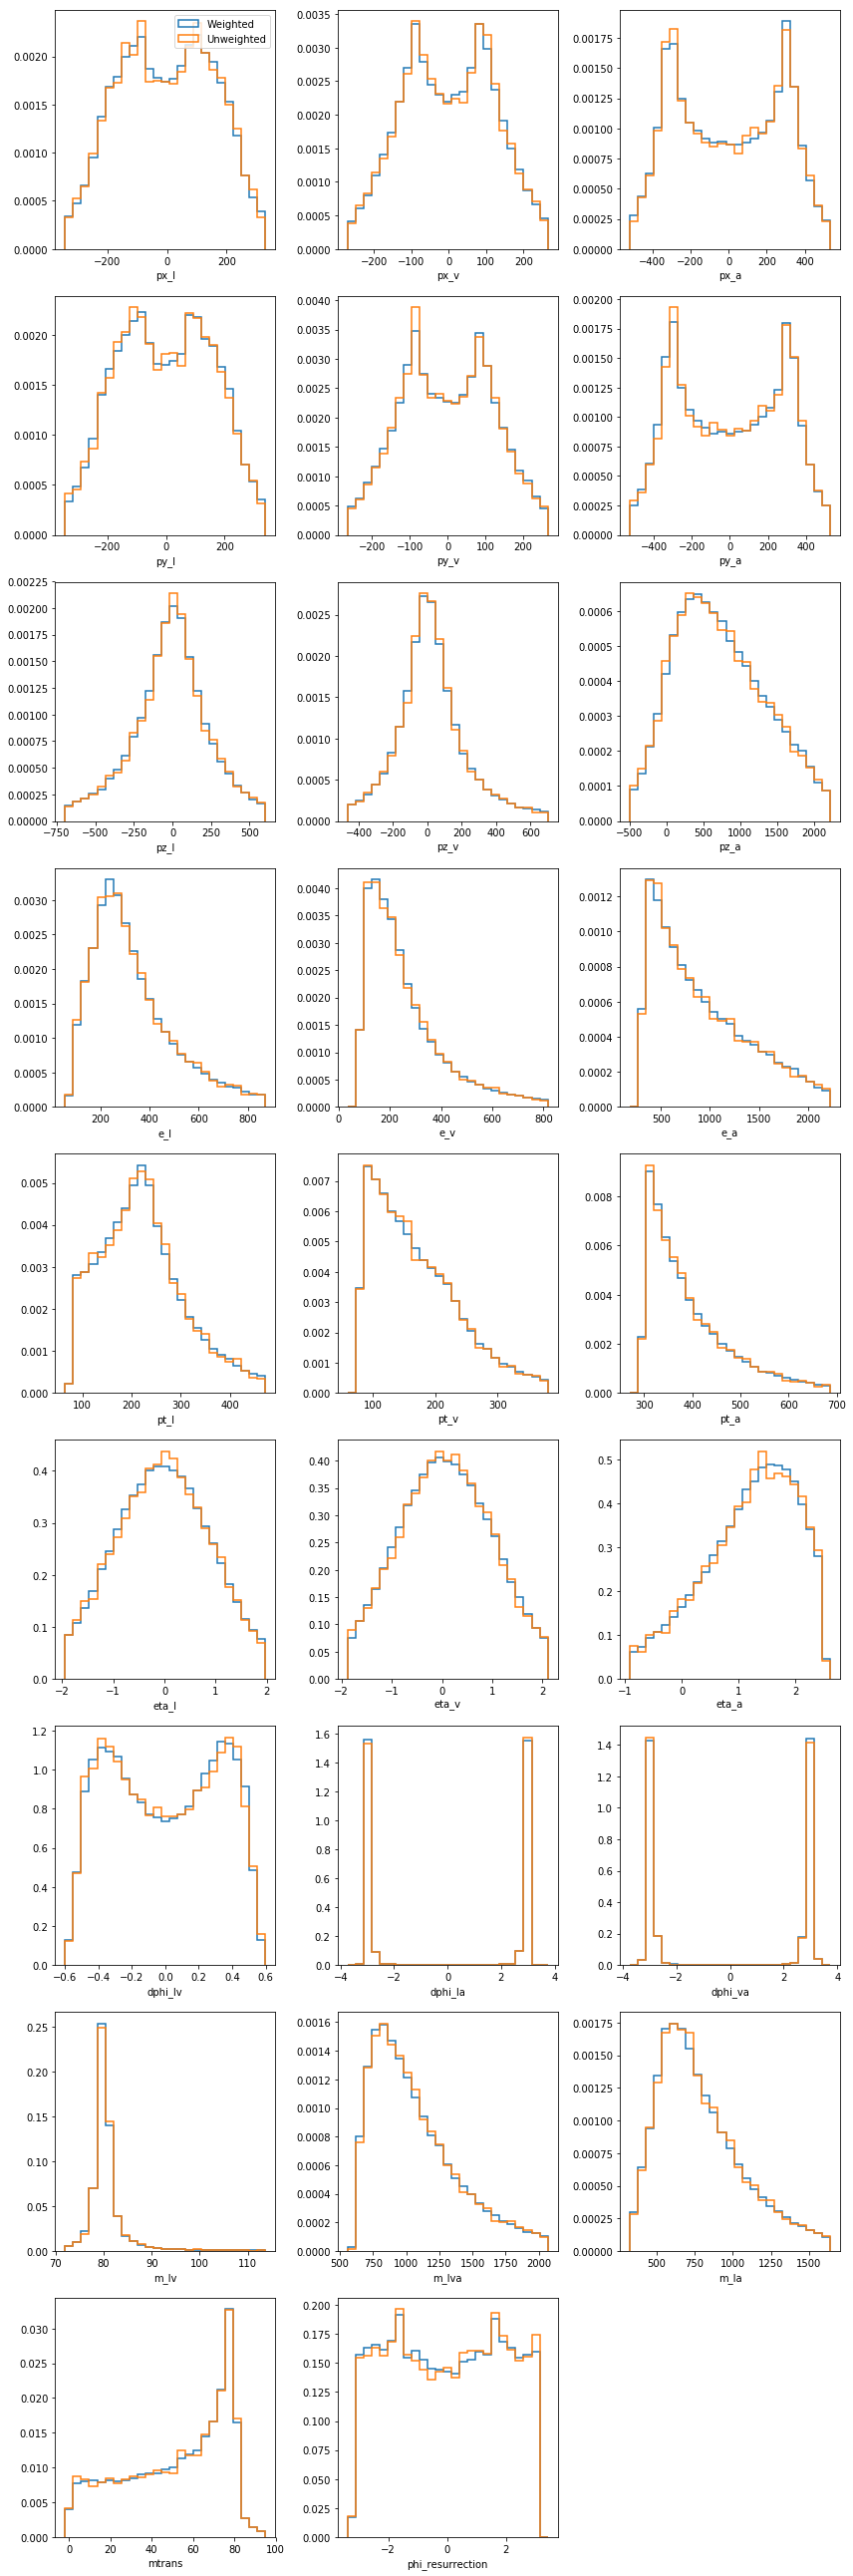

In [4]:
bins = 25
n_observables = x_unweighted.shape[1]
n_cols = 3
n_rows = (n_observables + n_cols - 1) // n_cols
labels = sa.observables.keys()

plt.figure(figsize=(4. * n_cols, 4. * n_rows))

for i, label in enumerate(labels):
    xmin = np.percentile(x_unweighted[:,i], 5.)
    xmax = np.percentile(x_unweighted[:,i], 95.)
    xwidth = xmax - xmin
    xmin -= xwidth * 0.1
    xmax += xwidth * 0.1
    x_range = (xmin, xmax)
    
    ax = plt.subplot(n_rows, n_cols, i+1)
       
    plt.hist(x_weighted[:,i], weights=weights, histtype='step', range=x_range, bins=bins, 
             lw=1.5, label=r'Weighted', normed=True)
    plt.hist(x_unweighted[:,i], histtype='step', range=x_range, bins=bins, 
             lw=1.5, label=r'Unweighted', normed=True)
    
    if i == 0:
        plt.legend()
        
    plt.xlabel(label)
    
plt.tight_layout()
plt.show()

### T1c) Delphes and Pythia Distributions

Let us also plot distributions from Pythia and Delphes

In [5]:
nsamples=10000
sa_pythia = SampleAugmenter('data/madminer_pythiadata.h5', debug=False)
x_weighted_pythia, weights_pythia = sa_pythia.extract_raw_data(theta=[0.,0.])

x_unweighted_pythia, _ = sa_pythia.extract_samples_train_plain(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=nsamples,
    folder=None,
    filename=None,
    test_split=None
)

sa_detector = SampleAugmenter('data/madminer_detectordata.h5', debug=False)
x_weighted_detector, weights_detector = sa_detector.extract_raw_data(theta=[0.,0.])

x_unweighted_detector, _ = sa_detector.extract_samples_train_plain(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=nsamples,
    folder=None,
    filename=None,
    test_split=None
)

And plot them

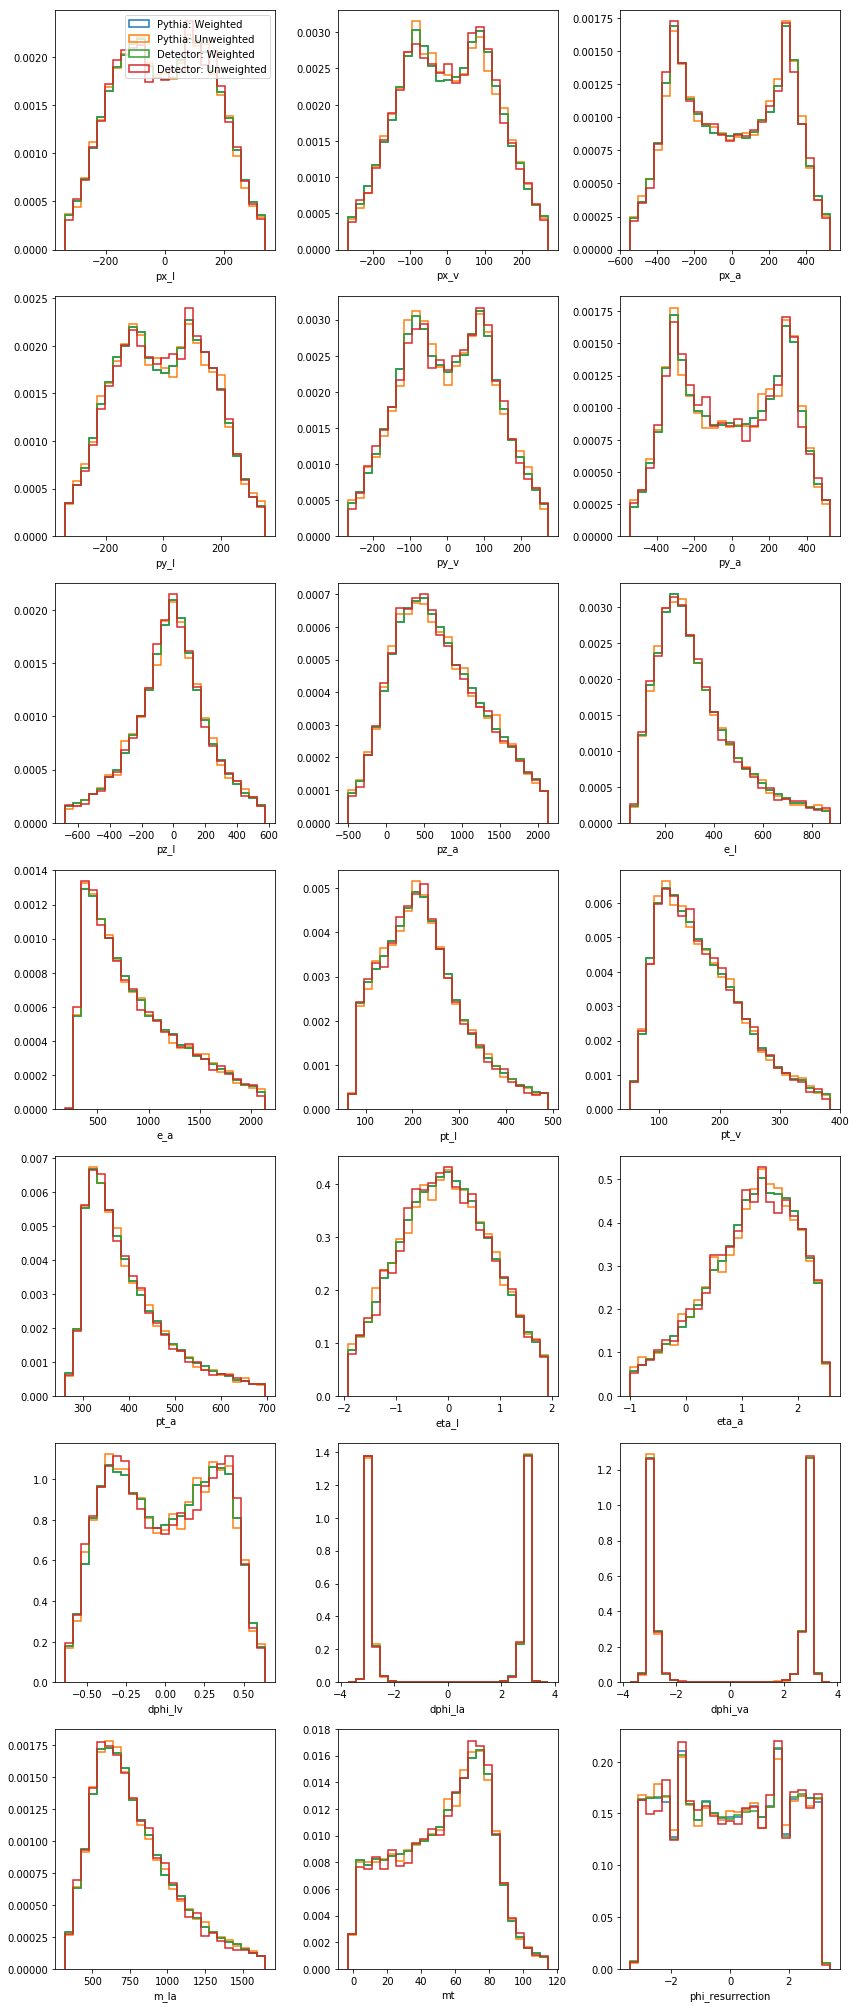

In [6]:
bins = 25
n_observables = x_unweighted_pythia.shape[1]
n_cols = 3
n_rows = (n_observables + n_cols - 1) // n_cols
labels = sa_pythia.observables.keys()

plt.figure(figsize=(4. * n_cols, 4. * n_rows))

for i, label in enumerate(labels):
    xmin = np.percentile(x_unweighted_pythia[:,i], 5.)
    xmax = np.percentile(x_unweighted_pythia[:,i], 95.)
    xwidth = xmax - xmin
    xmin -= xwidth * 0.1
    xmax += xwidth * 0.1
    x_range = (xmin, xmax)
    
    ax = plt.subplot(n_rows, n_cols, i+1)
       
    plt.hist(x_weighted_pythia[:,i], weights=weights_pythia, histtype='step', range=x_range, bins=bins, 
             lw=1.5, label=r'Pythia: Weighted', normed=True)
    plt.hist(x_unweighted_pythia[:,i], histtype='step', range=x_range, bins=bins, 
             lw=1.5, label=r'Pythia: Unweighted', normed=True)
    
    plt.hist(x_weighted_detector[:,i], weights=weights_detector, histtype='step', range=x_range, bins=bins, 
             lw=1.5, label=r'Detector: Weighted', normed=True)
    plt.hist(x_unweighted_detector[:,i], histtype='step', range=x_range, bins=bins, 
             lw=1.5, label=r'Detector: Unweighted', normed=True)
    
    if i == 0:
        plt.legend()
        
    plt.xlabel(label)
    
plt.tight_layout()
plt.show()